# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
websites.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,1,62,146,2,2.0,1


In [4]:
websites.shape

(1781, 21)

In [5]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [6]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [7]:
# comment 
# features are columns containing data 
# type is the column we want to predict. benign(B)=0 and malicious(M)=1

In [8]:
df = websites.copy()

In [9]:
df.columns = df.columns.str.lower().str.strip()

In [10]:
df.duplicated().sum()

0

In [11]:
df.eq(" ").any()

url                          False
url_length                   False
number_special_characters    False
charset                      False
server                       False
content_length               False
whois_country                False
whois_statepro               False
whois_regdate                False
whois_updated_date           False
tcp_conversation_exchange    False
dist_remote_tcp_port         False
remote_ips                   False
app_bytes                    False
source_app_packets           False
remote_app_packets           False
source_app_bytes             False
remote_app_bytes             False
app_packets                  False
dns_query_times              False
type                         False
dtype: bool

In [12]:
df.tail(3)

,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,...,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1780,B0_676,249,40,utf-8,Microsoft-IIS/8.5,24435.0,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,...,6,11,2314,25,28,3039,2776,25,6.0,0


In [13]:
df.select_dtypes(include='object')

,url,charset,server,whois_country,whois_statepro,whois_regdate,whois_updated_date
0,M0_109,iso-8859-1,nginx,NaN,NaN,10/10/2015 18:21,NaN
1,B0_2314,UTF-8,Apache/2.4.10,NaN,NaN,NaN,NaN
2,B0_911,us-ascii,Microsoft-HTTPAPI/2.0,NaN,NaN,NaN,NaN
3,B0_113,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45
4,B0_403,UTF-8,NaN,US,TX,12/05/1996 0:00,11/04/2017 0:00
...,...,...,...,...,...,...,...
1776,M4_48,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00
1777,M4_41,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00
1778,B0_162,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00
1779,B0_1152,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00


In [14]:
# Your comment here


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [15]:
num = df.select_dtypes(include=['number'])
num_corr = num.corr().round(4)

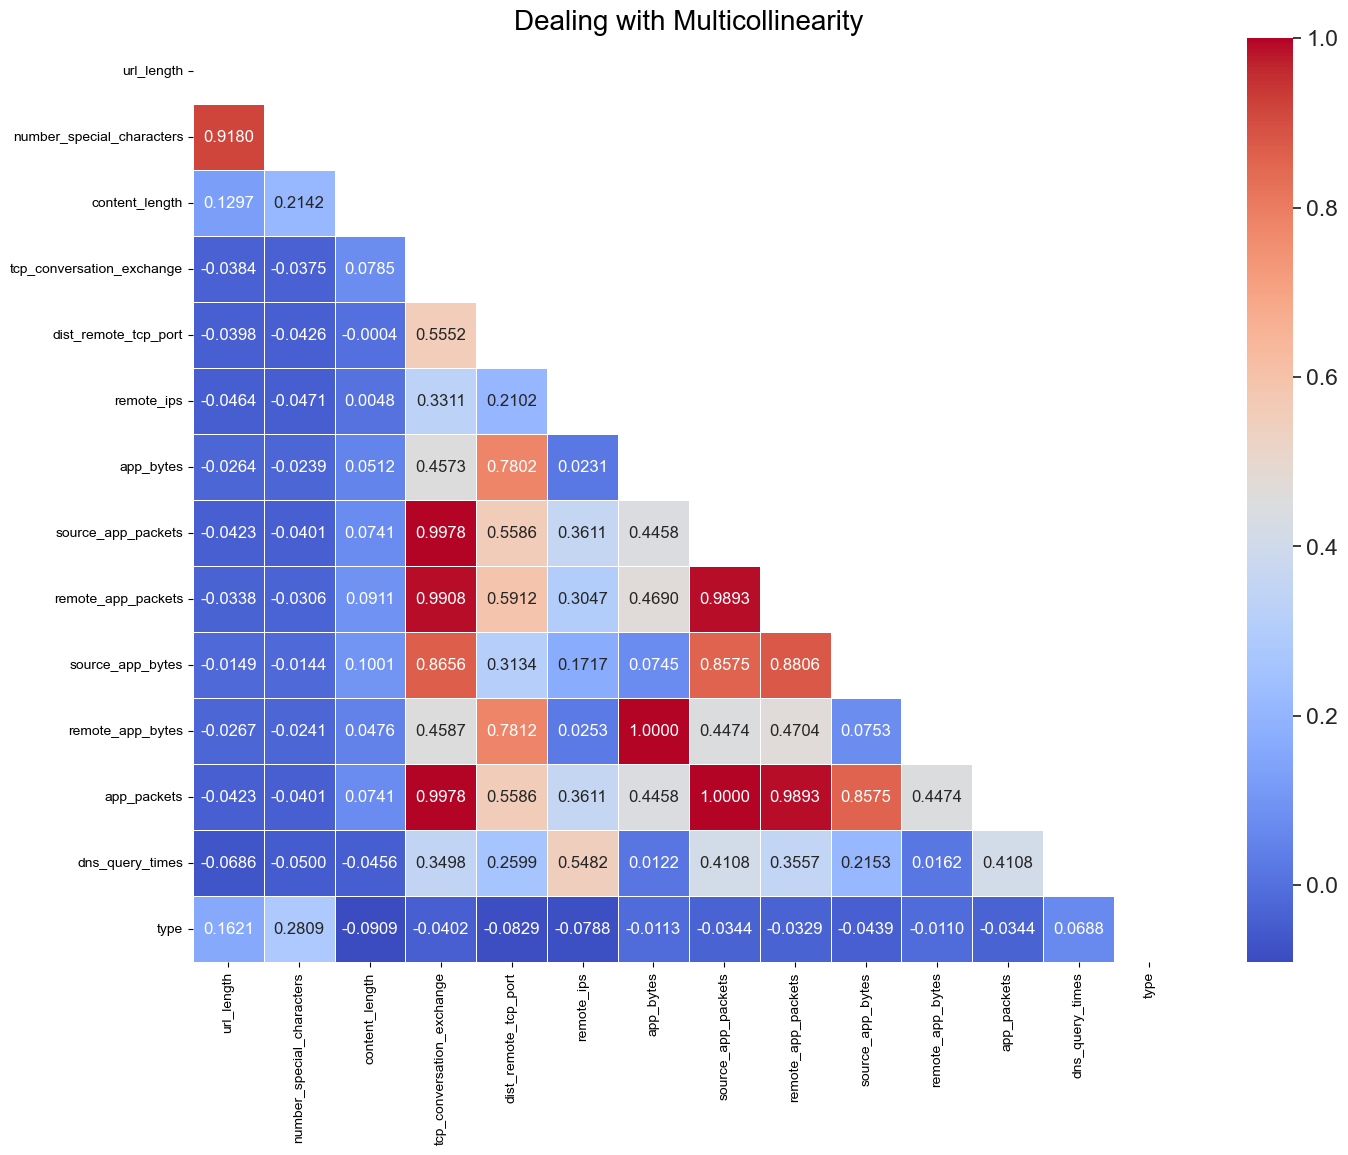

In [16]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(16, 12))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".4f", ax=ax) 
plt.xticks(rotation=90)
plt.title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [17]:
num.corr()['type'].sort_values(ascending=False)

type                         1.000000
number_special_characters    0.280897
url_length                   0.162104
dns_query_times              0.068753
remote_app_bytes            -0.011004
app_bytes                   -0.011262
remote_app_packets          -0.032897
source_app_packets          -0.034414
app_packets                 -0.034414
tcp_conversation_exchange   -0.040202
source_app_bytes            -0.043852
remote_ips                  -0.078783
dist_remote_tcp_port        -0.082925
content_length              -0.090852
Name: type, dtype: float64

In [18]:
df.drop(columns=['remote_app_bytes','app_packets','remote_app_packets','source_app_packets', 'url_length'],inplace=True)

In [19]:
# Your comment here
# 'remote_app_bytes' and 'app_bytes' have correlation of 1 and 'remote_app_bytes' is less correlated with 'type', so we dropped it.
# 'app_packets' and 'source_app_packet' have correlation of 1 and both have same relationship with 'type' but we drop 'app_packets'because it has also storng correlation with other columns.
# 'remote_app_packets' and 'tcp_conversation_exchange' have correlation of 0.9908 and 'app_packets' is less correlated to 'type', so we dropped it.
# 'tcp_conversation_exchange' and 'source_app_packets' have correlation of 0.9978 and 'source_app_packets' is less correlated to 'type', so we dropped it.
# 'number_special_characters' and 'url_length 'have correlation of 0.9180 and 'tcp_conversation_exchange' is less correlated to 'type', so we dropped it.
# dataset no longer contains columns that are correlated for over 90%

In [20]:
num = df.select_dtypes(include=['number'])
num_corr = num.corr().round(4)

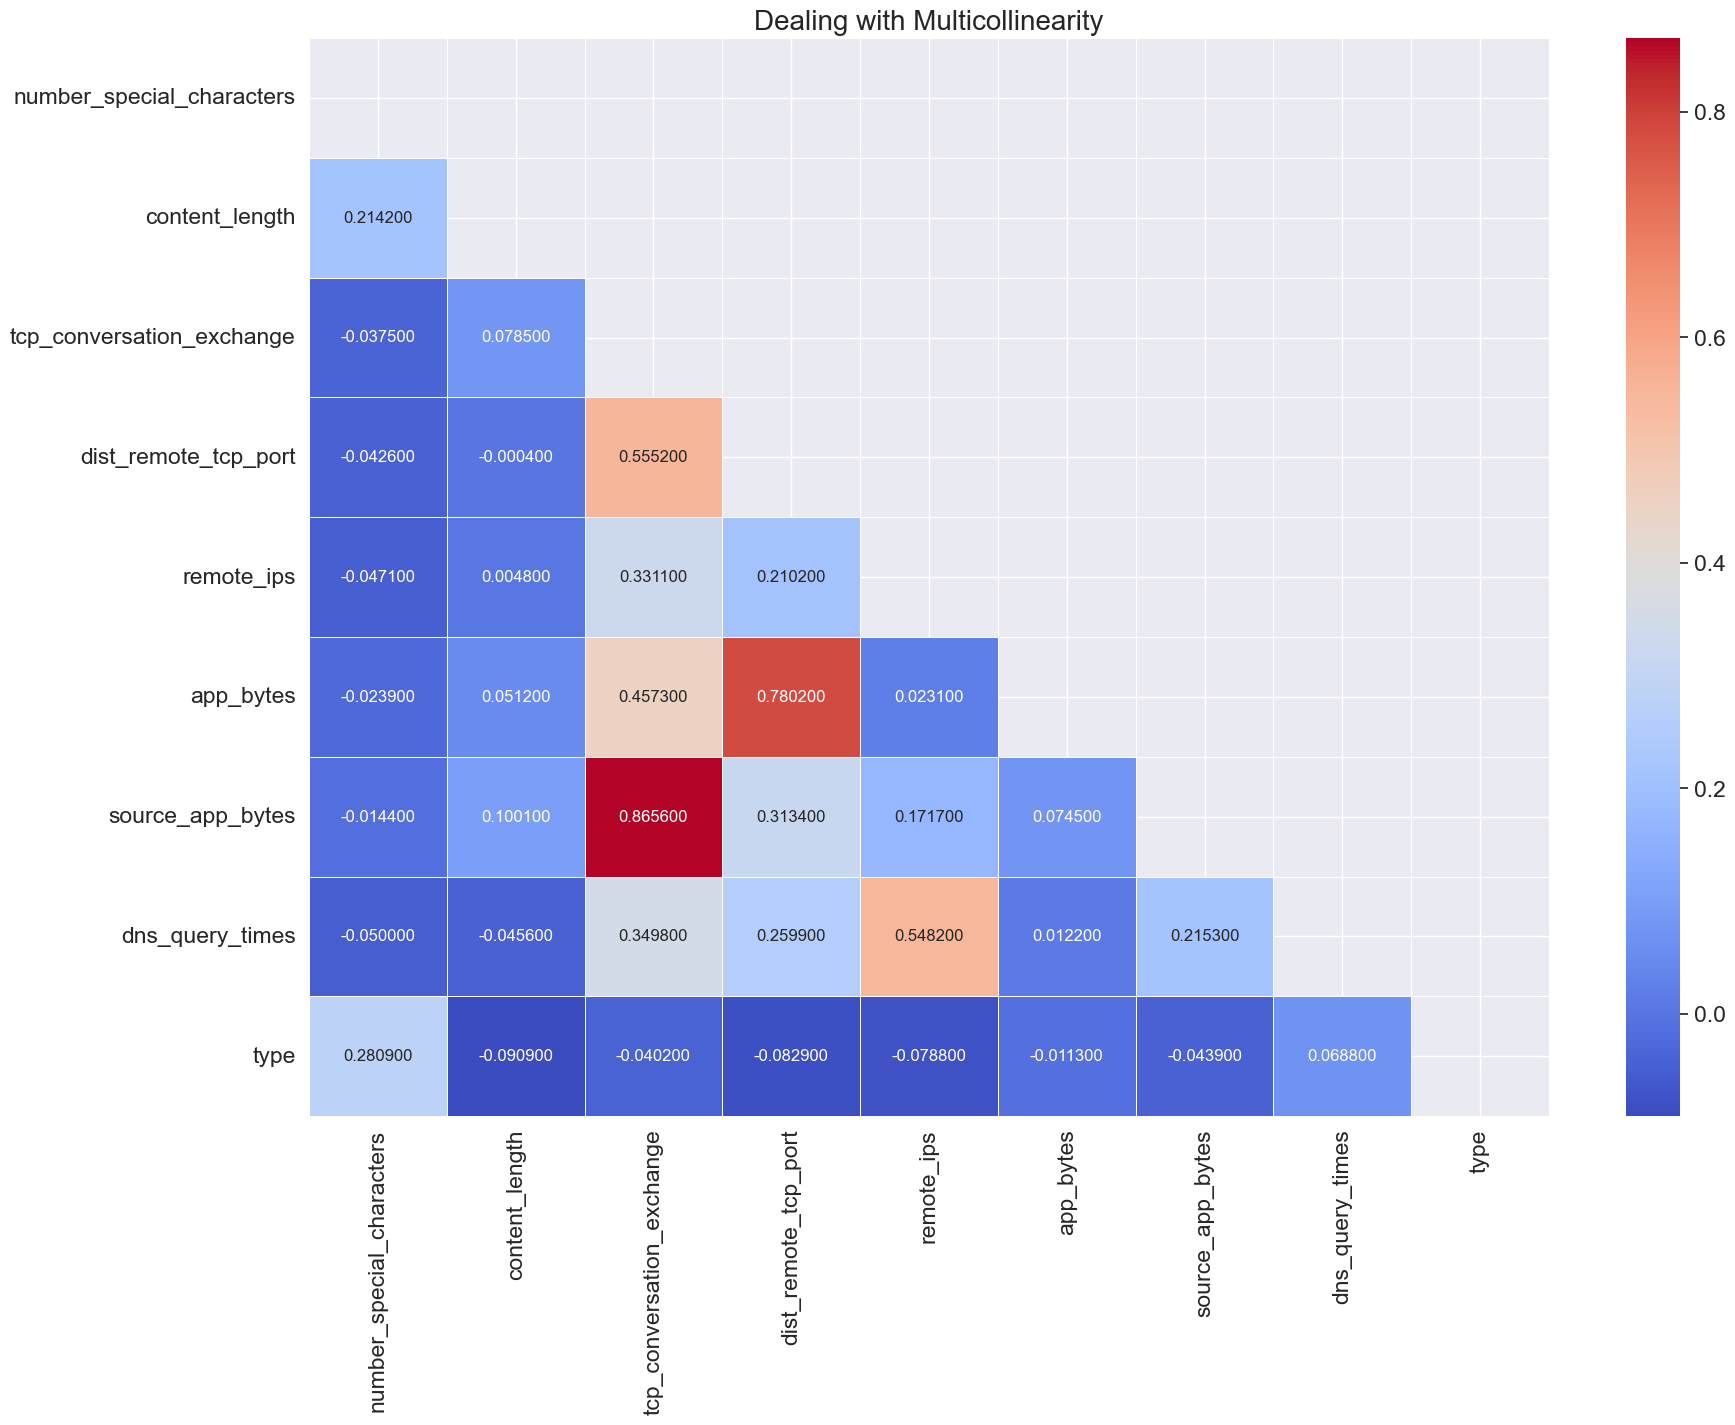

In [21]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 14))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".6f", ax=ax) 
plt.xticks(rotation=90)
plt.title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [22]:
df.isnull().sum()

url                            0
number_special_characters      0
charset                        7
server                       176
content_length               812
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_bytes               0
dns_query_times                1
type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [23]:
Ratio_content_lenght = round(812/df.shape[0],2)
print(f"Missing values in column 'content_lenght' in ratio to its total number of rows:\n {Ratio_content_lenght*100}%")

Missing values in column 'content_lenght' in ratio to its total number of rows:
 46.0%


In [24]:
df.drop(columns='content_length',inplace=True)

In [25]:
# Your comment here
# almost half of data in this column is missing so we can drop this column

In [26]:
df.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [27]:
df.isnull().any()

url                          False
number_special_characters    False
charset                      False
server                       False
whois_country                False
whois_statepro               False
whois_regdate                False
whois_updated_date           False
tcp_conversation_exchange    False
dist_remote_tcp_port         False
remote_ips                   False
app_bytes                    False
source_app_bytes             False
dns_query_times              False
type                         False
dtype: bool

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [28]:
df.whois_country.unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [29]:
df.whois_country = df.whois_country.replace({'Cyprus':'CY','us':'US',"[u'GB'; u'UK']":'UK','GB':'UK','United Kingdom':'UK','ru':'RU'})

In [30]:
df.whois_country.unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'UK', 'NL', 'UG', 'JP',
       'CN', 'SI', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE',
       'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

Text(0.5, 1.0, 'Value Counts for whois_country')

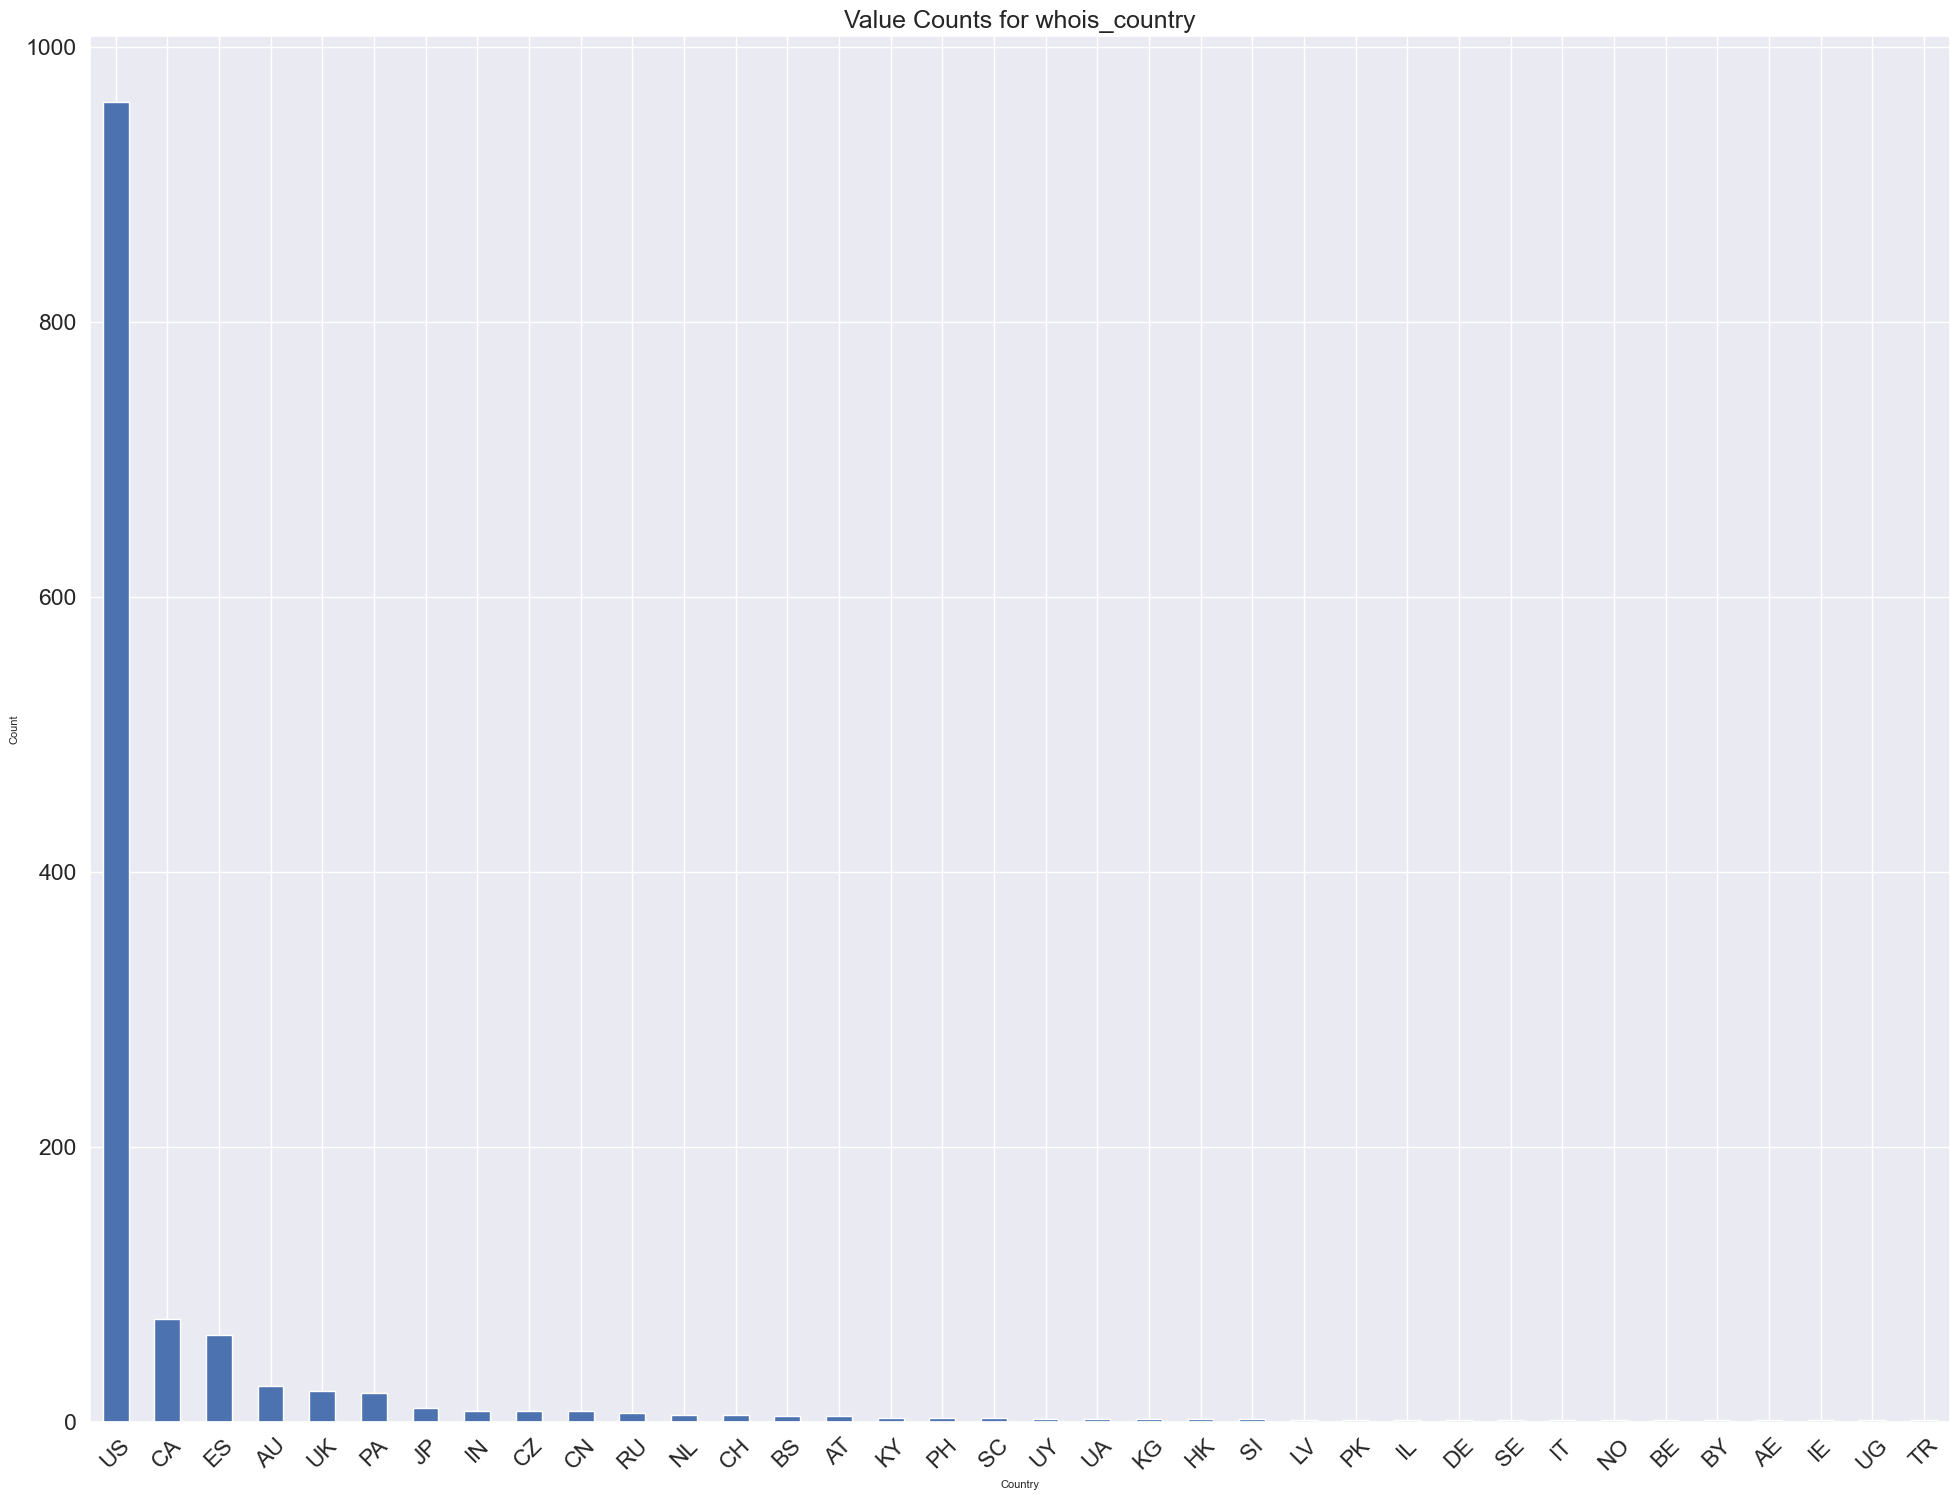

In [31]:
f, ax = plt.subplots(figsize=(24, 18))
#sns.set(font_scale=4) 
df.whois_country.value_counts().plot.bar(rot=45)
plt.xlabel('Country',fontsize=8)
plt.ylabel('Count',fontsize=8)
plt.title('Value Counts for whois_country')

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [32]:
top_10 = df.whois_country.value_counts().sort_values(ascending=False)[:10]
df.whois_country = df.whois_country.apply(lambda x: x if x in top_10 else "OTHER")

In [33]:
df.whois_country.value_counts()

whois_country
US       960
CA        75
ES        63
OTHER     56
AU        26
UK        22
PA        21
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [34]:
df.drop(columns=['whois_statepro','whois_regdate','whois_updated_date'],inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [35]:
df.dtypes

url                           object
number_special_characters      int64
charset                       object
server                        object
whois_country                 object
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_bytes               int64
dns_query_times              float64
type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [36]:
df.drop('url',axis=1,inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [37]:
df.charset.value_counts()

charset
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

In [38]:
df.charset = df.charset.replace({'UTF-8':'utf-8','ISO-8859-1':'iso-8859-1'})

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [39]:
df.server.value_counts()

server
Apache                                                                                311
nginx                                                                                 144
cloudflare-nginx                                                                       80
Microsoft-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
mw2114.codfw.wmnet                                                                      1
mw2199.codfw.wmnet                                                                      1
fbs                                                                                     1
Apache/2.2.16 (Debian)                                                                  1
Nam

![Think Hard](../images/think-hard.jpg)

In [40]:
# Your comment here
# we can put the severs contain same word in one category.e.g Apache/2.2.16 (Debian) can be consider same as Apache. 

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [41]:
def relabel(x):
    if 'microsoft' in x.lower():
        return 'Microsoft'
    if 'apache' in x.lower():
        return 'Apache'
    if 'nginx' in x.lower():
        return 'Nginx'
    else:
        return 'Other'
    
df['server'] = df['server'].apply(relabel)  


In [42]:
# Count `SERVER` value counts here
df.server.value_counts()

server
Apache       491
Nginx        323
Other        299
Microsoft    144
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [43]:
website_dummy = pd.get_dummies(df, dtype=int)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [44]:
website_dummy

,number_special_characters,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_bytes,dns_query_times,type,charset_iso-8859-1,charset_us-ascii,...,whois_country_CA,whois_country_CN,whois_country_CZ,whois_country_ES,whois_country_IN,whois_country_JP,whois_country_OTHER,whois_country_PA,whois_country_UK,whois_country_US
3,6,31,22,3,3812,18784,8.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,7,11,6,9,894,838,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,6,12,0,3,1189,8559,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,6,0,0,0,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10,6,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,16,0,0,0,0,186,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1777,17,0,0,0,0,124,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1778,34,83,2,6,6631,132181,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1779,34,0,0,0,0,0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
website_dummy.dtypes

number_special_characters      int64
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_bytes               int64
dns_query_times              float64
type                           int64
charset_iso-8859-1             int64
charset_us-ascii               int64
charset_utf-8                  int64
charset_windows-1251           int64
charset_windows-1252           int64
server_Apache                  int64
server_Microsoft               int64
server_Nginx                   int64
server_Other                   int64
whois_country_AU               int64
whois_country_CA               int64
whois_country_CN               int64
whois_country_CZ               int64
whois_country_ES               int64
whois_country_IN               int64
whois_country_JP               int64
whois_country_OTHER            int64
whois_country_PA               int64
whois_country_UK               int64
w

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [51]:
from sklearn.model_selection import train_test_split

y = website_dummy.drop(["type"],axis=1)
X = website_dummy["type"]

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size= 0.20,random_state = 42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [61]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print(f"Confusion matrix:\n{conf_matrix}\n")
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Confusion matrix:
[[224   0]
 [ 12  16]]

Test data accuracy:  0.9523809523809523
Train data accuracy:  0.9422885572139303


<Figure size 400x200 with 0 Axes>

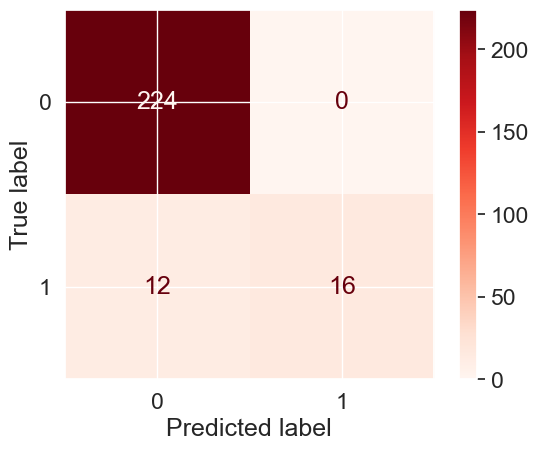

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
plt.figure(figsize=(4, 2))
disp.plot(cmap='Reds')  
plt.grid(True)
plt.show()

What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:
# TP-There are 224 true positive (correctly predicted as positive).
# FP-There are 12 false positive (predicted positive, but actually negative).
# TN-There are 16 true negative (correctly predicted as negative).
# FN-There are 0 false nagative (predicted negative, but actually positive).

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [75]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [95]:
pred = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test,y_pred)

print(f"Confusion matrix:\n{cm}")


Confusion matrix:
[[221   3]
 [ 11  17]]


<Figure size 400x200 with 0 Axes>

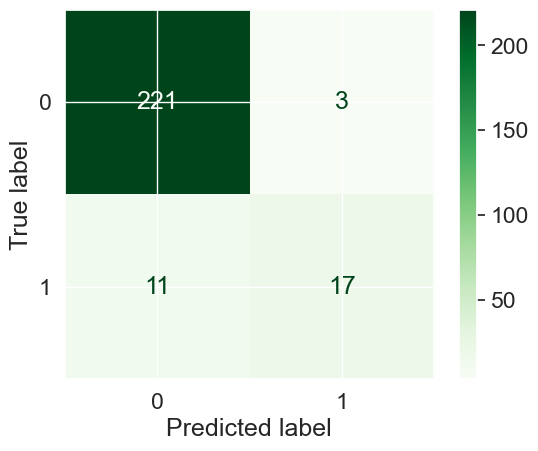

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(4, 2))
disp.plot(cmap='Greens')  
plt.grid(True)
plt.show()

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [92]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
pred = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print(f"Confusion matrix:\n{cm}")
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Confusion matrix:
[[221   3]
 [ 11  17]]
Test data accuracy:  0.9484126984126984
Train data accuracy:  0.96318407960199


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here